# File descriptions

- donations.csv - contains information about the donations to each project. This is only provided for projects in the training set.
- essays.csv - contains project text posted by the teachers. This is provided for both the training and test set.
- projects.csv - contains information about each project. This is provided for both the training and test set.
- resources.csv - contains information about the resources requested for each project. This is provided for both the training and test set.
- outcomes.csv - contains information about the outcomes of projects in the training set.
- sampleSubmission.csv - contains the project ids of the test set and shows the submission format for the competition.

# Data science for social goods - Submission from Shao Ying (Clare) Huang

Date: March 11, 2017

In [1]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

donations = pd.read_csv("donations.csv")
essays = pd.read_csv("essays.csv")
projects = pd.read_csv("projects.csv")
resources = pd.read_csv("resources.csv")
outcomes = pd.read_csv("outcomes.csv")

## Exploratory analysis

Describe the dataset using counts, averages, frequency tabeles, and plots. Do you see anything interesting or potentially problematic?

Observation: It is rare for a project to be labelled 'exciting'.

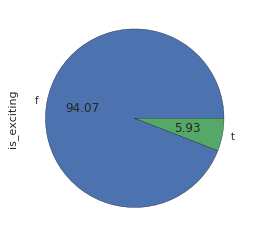

In [97]:
outcomes['is_exciting'].value_counts().plot.pie(figsize=(4, 4),autopct='%.2f')

## Exporing outcome.csv

Criteria that if not fulfilled, the project is _not_ exciting:

"at_least_1_green_donation", "fully_funded", "at_least_1_green_donation", "great_chat"

In [101]:
True_False_outcome_names = ["at_least_1_teacher_referred_donor","fully_funded","at_least_1_green_donation",\
                                            "great_chat","three_or_more_non_teacher_referred_donors",\
                                            "one_non_teacher_referred_donor_giving_100_plus",\
                                            "donation_from_thoughtful_donor"]
for outcome_names in True_False_outcome_names:
    outcome_class = pd.crosstab(index=outcomes["is_exciting"],columns=outcomes[outcome_names],margins=True)
                                #normalize='all')
    print(outcome_class)
    print("-----------------------")


at_least_1_teacher_referred_donor       f       t     All
is_exciting                                              
f                                  400268   87950  488218
t                                       0   36710   36710
All                                400268  124660  524928
-----------------------
fully_funded       f       t     All
is_exciting                         
f             188643  393973  582616
t                  0   36710   36710
All           188643  430683  619326
-----------------------
at_least_1_green_donation       f       t     All
is_exciting                                      
f                          146235  341983  488218
t                               0   36710   36710
All                        146235  378693  524928
-----------------------
great_chat        f       t     All
is_exciting                        
f            432156  150460  582616
t                 0   36710   36710
All          432156  187170  619326
-----------------------

## How does the great_messages_proportion look like for exciting and non-exciting projects?

/home/csyhuang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/csyhuang/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


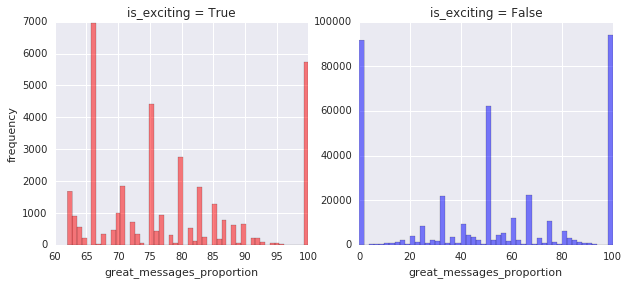

In [98]:
# great_messages_proportion -  how great_chat is calculated. proportion of comments on the project page that are unique. 
# If > avg (currently 62%) then great_chat = True

plt.subplots(figsize=(10,4))
plt.subplot(121)
plt.hist(outcomes[~pd.isnull(outcomes.great_messages_proportion)][outcomes.is_exciting=='t'].great_messages_proportion,\
         color='r',alpha=0.5,bins=50);
plt.title('is_exciting = True')
plt.xlabel('great_messages_proportion')
plt.ylabel('frequency')
plt.subplot(122)
plt.title('is_exciting = False')
plt.hist(outcomes[~pd.isnull(outcomes.great_messages_proportion)][outcomes.is_exciting=='f'].great_messages_proportion,\
         color='b',alpha=0.5,bins=50);
plt.xlabel('great_messages_proportion')


## Exploring projects.csv

Index([u'projectid', u'teacher_acctid', u'schoolid', u'school_ncesid',
       u'school_latitude', u'school_longitude', u'school_city',
       u'school_state', u'school_zip', u'school_metro', u'school_district',
       u'school_county', u'school_charter', u'school_magnet',
       u'school_year_round', u'school_nlns', u'school_kipp',
       u'school_charter_ready_promise', u'teacher_prefix',
       u'teacher_teach_for_america', u'teacher_ny_teaching_fellow',
       u'primary_focus_subject', u'primary_focus_area',
       u'secondary_focus_subject', u'secondary_focus_area', u'resource_type',
       u'poverty_level', u'grade_level', u'fulfillment_labor_materials',
       u'total_price_excluding_optional_support',
       u'total_price_including_optional_support', u'students_reached',
       u'eligible_double_your_impact_match', u'eligible_almost_home_match',
       u'date_posted', u'at_least_1_teacher_referred_donor'],
      dtype='object')


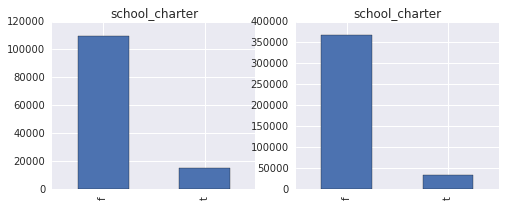

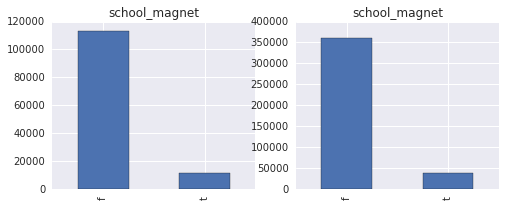

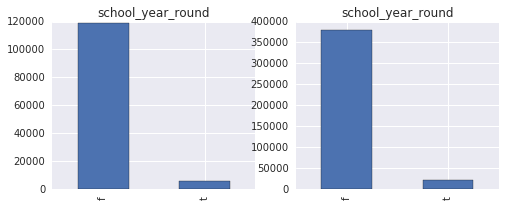

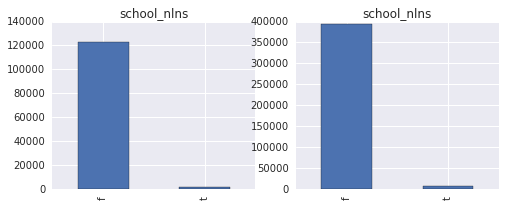

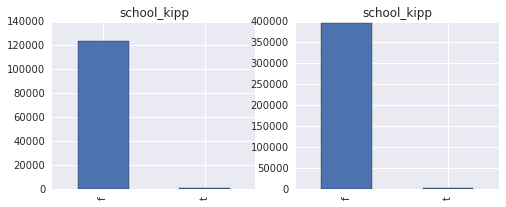

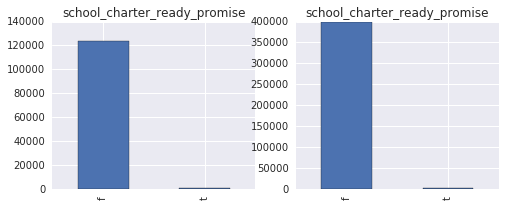

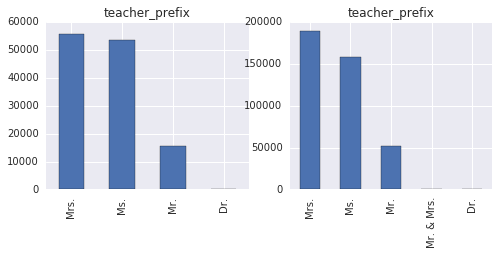

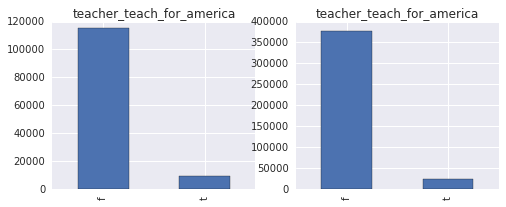

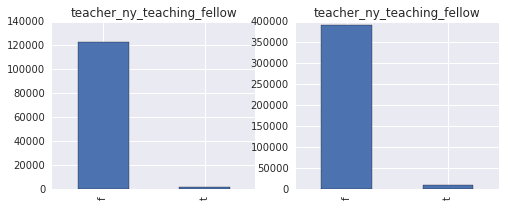

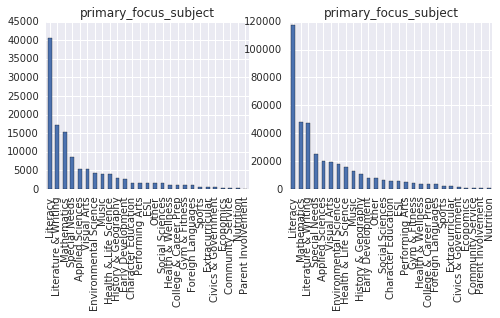

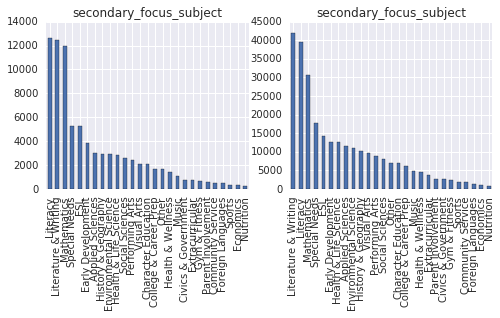

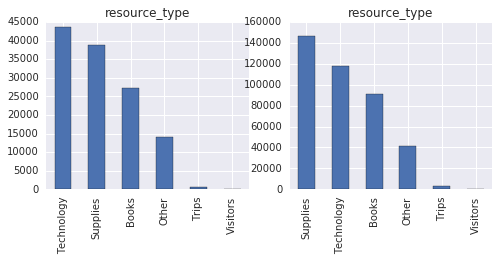

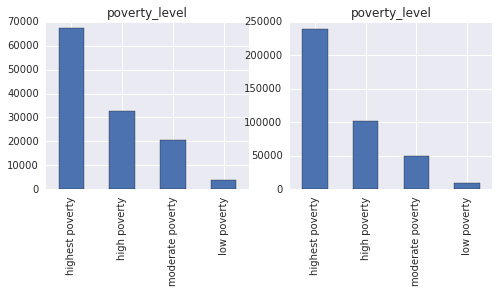

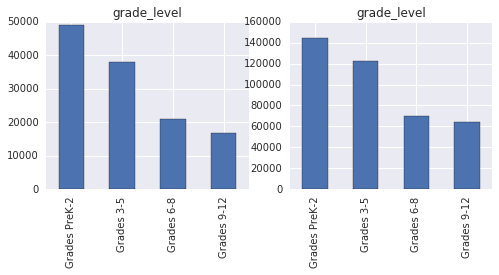

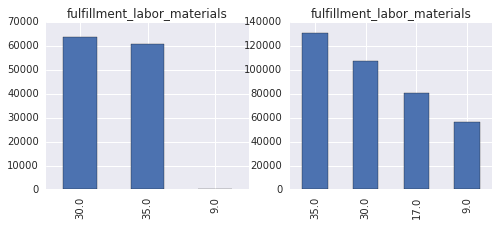

In [190]:
# projects

# projects_with_outcome = projects.join(outcomes[['projectid','is_exciting','fully_funded']],on='projectid', how='inner')
# projects_with_outcome                                           
# outcomes.is_exciting
# outcomes.projectid

# print projects.columns
# outcomes.columns

projects_with_outcome = projects.merge(outcomes[['projectid','at_least_1_teacher_referred_donor']], how='inner')
project_fully_funded = projects_with_outcome[projects_with_outcome.at_least_1_teacher_referred_donor=='t']
project_not_fully_funded = projects_with_outcome[projects_with_outcome.at_least_1_teacher_referred_donor=='f']

print projects_with_outcome.columns

for col in [u'school_charter', u'school_magnet',
       u'school_year_round', u'school_nlns', u'school_kipp',
       u'school_charter_ready_promise', u'teacher_prefix',u'teacher_teach_for_america', 
       u'teacher_ny_teaching_fellow',u'primary_focus_subject',u'secondary_focus_subject',u'resource_type',
       u'poverty_level', u'grade_level', u'fulfillment_labor_materials']:
    aa = project_fully_funded[col].value_counts()
    bb = project_not_fully_funded[col].value_counts()

    plt.subplots(figsize=(8,3))
    plt.subplot(121)
    plt.title(col)    
    aa.plot.bar()
    plt.subplot(122)
    plt.title(col)    
    bb.plot.bar()


In [29]:
# Look at the outcomes
outcomes
for col in outcomes.columns[1:]:
#     print col
    print outcomes[col].value_counts()
#     print col.value_counts()

f    582616
t     36710
Name: is_exciting, dtype: int64
f    400268
t    124660
Name: at_least_1_teacher_referred_donor, dtype: int64
t    430683
f    188643
Name: fully_funded, dtype: int64
t    378693
f    146235
Name: at_least_1_green_donation, dtype: int64
f    432156
t    187170
Name: great_chat, dtype: int64
t    272378
f    252550
Name: three_or_more_non_teacher_referred_donors, dtype: int64
t    377809
f    147119
Name: one_non_teacher_referred_donor_giving_100_plus, dtype: int64
f    517992
t      6936
Name: donation_from_thoughtful_donor, dtype: int64
100.0    99916
0.0      91733
50.0     62273
66.0     29180
33.0     21711
75.0     15203
60.0     10756
25.0      8419
80.0      8335
40.0      8201
57.0      4947
83.0      4924
42.0      4085
71.0      4039
20.0      3750
62.0      3294
85.0      3171
55.0      2718
37.0      2348
28.0      2185
44.0      2171
16.0      1940
87.0      1859
70.0      1801
77.0      1764
54.0      1607
63.0      1521
45.0      1418
88.0      13

In [4]:

resources

,resourceid,projectid,vendorid,vendor_name,project_resource_type,item_name,item_number,item_unit_price,item_quantity
0,8a1c1c45bc30d065061912fd9114fcf3,ffffc4f85b60efc5b52347df489d0238,430.0,Woodwind and Brasswind,Technology,iPod nano 4th Gen 8GB (Black),249995.001,149.00,4.0
1,015d2c4935c50427964a12dc3f584091,ffffac55ee02a49d1abc87ba6fc61135,82.0,Best Buy for Business,Technology,Sony bloggie MHS-FS1 - camcorder - internal fl...,BB11216668,148.00,1.0
2,26a02944b2f0c25f9abdeacca3ede3ee,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,VX748 - Best-Buy Jumbo Crayons - 12-Color Box,VX748,69.95,1.0
3,7fef1f92cb4447d18d599f69ea27e833,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,LA138 - Best-Buy Write & Wipe Broad-Tip Marker...,LA138,34.95,1.0
4,8dccf77df25ee615bb1a68b98ba9d861,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,BJ7471 - 1 1/2&#34; Ruled Chart Tablet,BJ7471,10.95,4.0
5,76ad6546da5113f03162c3c38da3bd21,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,NF9763 - White Sentence Strips,NF9763,3.99,2.0
6,f2293c48469eeedd11820bf479a37f4b,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,HU18 - Electric Pencil Sharpener,HU18,44.95,1.0
7,8b0a477c471f955076c997b459ed672f,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,GG297 - Behavior Management Pocket Chart,GG297,19.95,1.0
8,aaabc2bfec809a6ee988f83c54f1af4d,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,LC1561 - Sentence Strip Storage Box,LC1561,6.95,1.0
9,dc122690989bb55bc5ccdb88fd6ef15b,ffff97ed93720407d70a2787475932b0,767.0,Lakeshore Learning Materials,Supplies,TT991 - Lakeshore Safety Name Tags - Set of 20,TT991,29.95,1.0


In [9]:

essays.columns

Index([u'projectid', u'teacher_acctid', u'title', u'short_description',
       u'need_statement', u'essay'],
      dtype='object')

In [146]:

outcomes[pd.isnull(outcomes.at_least_1_teacher_referred_donor)].is_exciting.value_counts()
outcomes

,projectid,is_exciting,at_least_1_teacher_referred_donor,fully_funded,at_least_1_green_donation,great_chat,three_or_more_non_teacher_referred_donors,one_non_teacher_referred_donor_giving_100_plus,donation_from_thoughtful_donor,great_messages_proportion,teacher_referred_count,non_teacher_referred_count
0,ffffc4f85b60efc5b52347df489d0238,f,NaN,f,NaN,f,NaN,NaN,NaN,NaN,NaN,NaN
1,ffffac55ee02a49d1abc87ba6fc61135,f,f,t,t,f,t,f,f,57.0,0.0,7.0
2,ffff97ed93720407d70a2787475932b0,f,f,t,t,t,t,t,f,100.0,0.0,3.0
3,ffff418bb42fad24347527ad96100f81,f,f,f,t,t,f,f,f,100.0,0.0,1.0
4,ffff2d9c769c8fb5335e949c615425eb,t,t,t,t,t,f,t,f,63.0,6.0,2.0
5,fffeebf4827d745aa36b17c2d38d1966,f,f,t,f,f,f,t,f,0.0,0.0,1.0
6,fffee68353ade53e7692b23098096683,f,f,f,f,f,f,f,f,0.0,0.0,2.0
7,fffec078a2249c2365f3086a6eac7e4a,f,f,t,f,f,f,t,f,NaN,0.0,1.0
8,fffeb149cd9b85d802b2500368fd605e,f,f,t,f,f,f,t,f,NaN,0.0,1.0
9,fffeaae9482c9b72cab5bbd3f061d362,f,f,f,f,f,f,f,f,0.0,0.0,1.0


# A Data Story
Find a specific interesting case in the data and tell us what happens with it. Provide evidence from the data that supports your narrative.

# Questions for the Project Partner
What questions would you ask the partner now that you have seen the data? What is missing that you might need to get from them or other data sources to do something useful with the data?

# Modeling
(For those applying for machine learning positions). Build (and validate) a model with the data that predicts a quantity of interest (fully funded for example), identifies underlying structure in the data, or explores a potentially important relationship among fields in the dataset. What did you learn from it? Why is it potentially useful or relevant to someone's decision making?

Save your notebook and commit it with an informative message, then push the commit to your repository on github.

## Clare's version of work

- First of all, what variable is mostly related to whether the project is exciting or not?
- There are actually two predictors that stands out in outcomes.csv. They are "at_least_1_teacher_referred_donor" and "great_chat". However, "great_chat" is sort of arbitrary because of the random threshold picked.
- The following would be focusing on predicting "at_least_1_teacher_referred_donor".

In [182]:
pd.options.display.max_columns = 999
projects_with_outcome2 = projects.merge(outcomes[['projectid','at_least_1_teacher_referred_donor']], how='inner')

projects_with_outcome2.head()

TF_labels = ['school_charter','school_magnet','school_year_round','school_nlns','school_kipp','school_charter_ready_promise',\
            'teacher_teach_for_america','teacher_ny_teaching_fellow','eligible_double_your_impact_match',\
             'eligible_double_your_impact_match','at_least_1_teacher_referred_donor']
projects_with_outcome2.replace(to_replace=['f','t'],value=[0,1],inplace=True)
projects_with_outcome2[TF_labels].fillna(value=0,inplace=True)
projects_with_outcome2 = projects_with_outcome2.drop(projects_with_outcome2[projects_with_outcome2.school_state=='La'].index)

# projects_with_outcome.groupby('school_state').count()

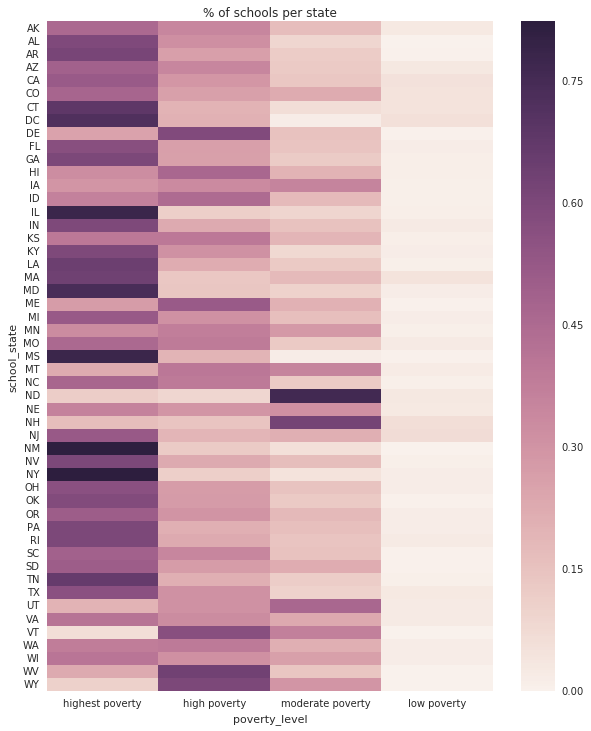

In [188]:
projects_with_outcome2[['school_state','poverty_level']].groupby('school_state').count()
# projects_with_outcome2[['school_state','poverty_level']].groupby('school_state').sum()
poverty_table = pd.crosstab(projects_with_outcome2['school_state'],projects_with_outcome2['poverty_level'],\
            normalize='index')[['highest poverty','high poverty','moderate poverty','low poverty']]

plt.figure(figsize=(10,12))
plt.title('% of schools per state')
ax = sns.heatmap(poverty_table)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,GradientBoostingClassifier

features = ["at_least_1_teacher_referred_donor","fully_funded","at_least_1_green_donation",\
                                            "great_chat","three_or_more_non_teacher_referred_donors",\
                                            "one_non_teacher_referred_donor_giving_100_plus",\
                                            "donation_from_thoughtful_donor"]


outcomes_to_fit = outcomes[features].replace(to_replace=['f','t'],value=[0,1])
outcomes_to_fit[pd.isnull(outcomes_to_fit)] = 0

print(features)

m = LogisticRegression()
m.fit(outcomes_to_fit, outcomes['is_exciting'])
print('==============Logistic Regression==============')
print(m.coef_)

m2 = ExtraTreesClassifier()
m2.fit(outcomes_to_fit, outcomes['is_exciting'])
print('==============Extra Trees Classifier==============')
print(m2.feature_importances_)

m3 = GradientBoostingClassifier()
m3.fit(outcomes_to_fit, outcomes['is_exciting'])
print('==============Gradient Boosting Classifier==============')
print(m3.feature_importances_)


['at_least_1_teacher_referred_donor', 'fully_funded', 'at_least_1_green_donation', 'great_chat', 'three_or_more_non_teacher_referred_donors', 'one_non_teacher_referred_donor_giving_100_plus', 'donation_from_thoughtful_donor']
==============Logistic Regression==============
[[ 15.49211882  11.46876467   9.86050451  14.81336906   5.76549949
    5.1631919    2.20668865]]
==============Extra Trees Classifier==============
[ 0.49738855  0.06557246  0.02135313  0.30976597  0.05451434  0.0499174
  0.00148816]
==============Gradient Boosting Classifier==============
[ 0.35254668  0.07544483  0.09897381  0.2220476   0.11402477  0.11446862
  0.02249369]


In [147]:
outcomes.columns

Index([u'projectid', u'is_exciting', u'at_least_1_teacher_referred_donor',
       u'fully_funded', u'at_least_1_green_donation', u'great_chat',
       u'three_or_more_non_teacher_referred_donors',
       u'one_non_teacher_referred_donor_giving_100_plus',
       u'donation_from_thoughtful_donor', u'great_messages_proportion',
       u'teacher_referred_count', u'non_teacher_referred_count'],
      dtype='object')

In [11]:
for variables in [donations,essays,projects,resources,outcomes]:
    print variables.columns
# donations

Index([u'donationid', u'projectid', u'donor_acctid', u'donor_city',
       u'donor_state', u'donor_zip', u'is_teacher_acct', u'donation_timestamp',
       u'donation_to_project', u'donation_optional_support', u'donation_total',
       u'dollar_amount', u'donation_included_optional_support',
       u'payment_method', u'payment_included_acct_credit',
       u'payment_included_campaign_gift_card',
       u'payment_included_web_purchased_gift_card',
       u'payment_was_promo_matched', u'via_giving_page', u'for_honoree',
       u'donation_message'],
      dtype='object')
Index([u'projectid', u'teacher_acctid', u'title', u'short_description',
       u'need_statement', u'essay'],
      dtype='object')
Index([u'projectid', u'teacher_acctid', u'schoolid', u'school_ncesid',
       u'school_latitude', u'school_longitude', u'school_city',
       u'school_state', u'school_zip', u'school_metro', u'school_district',
       u'school_county', u'school_charter', u'school_magnet',
       u'school_year_r